In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


C:\Users\NM TRADERS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
# Step 2: EDA to identify variables impacting employee retention
# Let's start by exploring the data
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

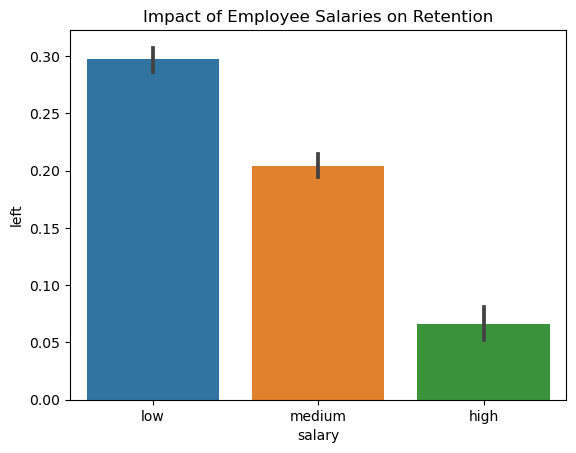

In [4]:
# Step 3: Plot bar charts to visualize the impact of employee salaries on retention
sns.barplot(x='salary', y='left', data=df)
plt.title('Impact of Employee Salaries on Retention')
plt.show()

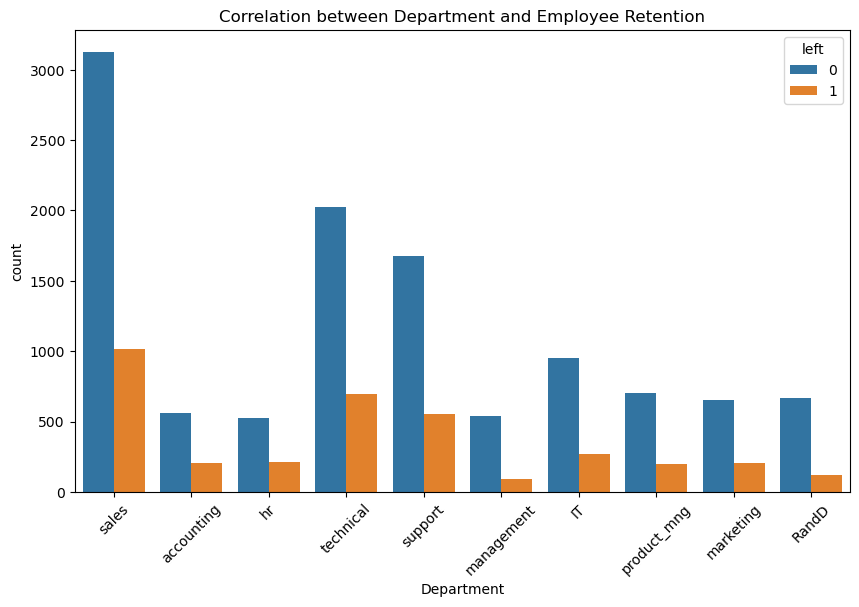

In [5]:
# Step 4: Plot bar charts to visualize the correlation between department and employee retention
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='left', data=df)
plt.title('Correlation between Department and Employee Retention')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Step 5: Build a logistic regression model using the identified variables
# Let's use satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company, Work_accident,
# and promotion_last_5years as features
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
        'Work_accident', 'promotion_last_5years']]
y = df['left']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [12]:
# Build the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

C:\Users\NM TRADERS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# Step 6: Measure the accuracy of the model
# Make predictions
y_pred = log_reg_model.predict(X_test)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the logistic regression model:', accuracy)


Accuracy of the logistic regression model: 0.7581333333333333
